<span style="font-family:Ebrima; font-weight:bold;font-size:2.4em;"> AIML MODULE PROJECT - Ensemble Techniques

<span style="font-family:Ebrima; font-weight:bold;font-size:1.5em;color:#0D96F2">Submitted By : RANJITH KUMAR S

<span style="font-family:Ebrima; font-weight:bold;font-size:1em;color:#2b79d4;">DOMAIN:</span> Telecom

<span style="font-family:Ebrima; font-weight:bold;font-size:1em;color:#2b79d4;">CONTEXT:</span> A telecom company wants to use their historical customer data to predict behaviour to retain customers. You can analyse all
relevant customer data and develop focused customer retention programs.

<span style="font-family:Ebrima; font-weight:bold;font-size:1em;color:#2b79d4;">DATA DESCRIPTION:</span> Each row represents a customer, each column contains customer’s attributes described on the column Metadata. The
data set includes information about:

Customers who left within the last month – the column is called Churn Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
 
Demographic info about customers – gender, age range, and if they have partners and dependents


<span style="font-family:Ebrima; font-weight:bold;font-size:1em;color:#2b79d4;">PROJECT OBJECTIVE:</span> To Build a model that will help to identify the potential customers who have a higher probability to churn. This helps the
company to understand the pinpoints and patterns of customer churn and will increase the focus on strategizing customer retention.

In [1]:
# importing Necessary Python libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# importing Necessary Python libraries for ML
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
#!pip install catboost
from catboost import CatBoostClassifier
#!pip install xgboost
from xgboost import XGBClassifier
#!pip install lightgbm
from lightgbm import LGBMClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import GridSearchCV,KFold,cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV,StratifiedKFold
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,ConfusionMatrixDisplay,precision_score,recall_score,f1_score,classification_report,roc_curve,plot_roc_curve,auc,precision_recall_curve,plot_precision_recall_curve,average_precision_score
from sklearn.ensemble import VotingClassifier
import time
from tqdm import tqdm

<span style="font-family:Ebrima; font-weight:bold;font-size:2.4em;color:#659A8E;"> PART A

<span style="font-family:Ebrima; font-weight:bold;font-size:1.5em;color:#b44b97;"> Part 1- 1 a. Read ‘TelcomCustomer-Churn_1.csv’ as a DataFrame and assign it to a variable

In [3]:
churn_1 = pd.read_csv('TelcomCustomer-Churn_1.csv') #Read 'TelcomCustomer-Churn_1.csv' file for local directory using pandas
churn_1.head(5)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  
0  No phone service             DSL             No  
1                No             DSL            Yes  
2                No             DSL            Yes  
3  No phone service             DSL            Yes  
4                No     Fiber optic             No

<span style="font-family:Ebrima; font-weight:bold;font-size:1.5em;color:#b44b97;"> Part 1- 1 b.Read ‘TelcomCustomer-Churn_2.csv’ as a DataFrame and assign it to a variable

In [4]:
churn_2 = pd.read_csv('TelcomCustomer-Churn_2.csv') #Read 'TelcomCustomer-Churn_2.csv' file for local directory using pandas
churn_2.head(5)

customerID OnlineBackup DeviceProtection TechSupport StreamingTV  \
0  7590-VHVEG          Yes               No          No          No   
1  5575-GNVDE           No              Yes          No          No   
2  3668-QPYBK          Yes               No          No          No   
3  7795-CFOCW           No              Yes         Yes          No   
4  9237-HQITU           No               No          No          No   

  StreamingMovies        Contract PaperlessBilling              PaymentMethod  \
0              No  Month-to-month              Yes           Electronic check   
1              No        One year               No               Mailed check   
2              No  Month-to-month              Yes               Mailed check   
3              No        One year               No  Bank transfer (automatic)   
4              No  Month-to-month              Yes           Electronic check   

   MonthlyCharges TotalCharges Churn  
0           29.85        29.85    No  
1           56.95       1889.5    No  
2           53.85       108.15   Yes  
3           42.30      1840.75    No  
4           70.70       151.65   Yes

<span style="font-family:Ebrima; font-weight:bold;font-size:1.5em;color:#b44b97;"> Part 1- 1 c.Merge both the DataFrames on key ‘customerID’ to form a single DataFrame

In [5]:
print ('The Shape of TelcomCustomer-Churn_1 dataset is:',churn_1.shape) #checking for the Shape of Churn1 dataframe
print ('The Shape of TelcomCustomer-Churn_2 dataset is:',churn_2.shape) #checking for the Shape of Churn2 dataframe

The Shape of TelcomCustomer-Churn_1 dataset is: (7043, 10)
The Shape of TelcomCustomer-Churn_2 dataset is: (7043, 12)


In [6]:
(churn_1['customerID'] == churn_2['customerID']).value_counts() #Checking for all the Customer ID Values on both dataframes

True    7043
Name: customerID, dtype: int64

In [7]:
churn = pd.merge(churn_1,churn_2,on='customerID',how='outer') # merging churn_1 and churn_2 dataframe based on CustomerID and Merge by outer

In [8]:
churn.to_csv('churn.csv',index=False) # Saving the Megred Dataset as CSV file

In [9]:
churn.head() #top 5 Row od Churn Data set

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [10]:
churn.shape

(7043, 21)

<span style="font-family:Ebrima; font-weight:bold;font-size:1.5em;color:#b44b97;"> Part 1- 1 d.Verify if all the columns are incorporated in the merged DataFrame by using simple comparisonOperator in Python

In [11]:
churn_1_cols = churn_1.columns.tolist() # Making a List with all the Columsn in the churn1 DataFrame
churn_2_cols = churn_2.columns[1:].tolist()  # Making a List with all the Columsn in the churn 2 DataFrame with out 0th row 'CustomerID'
churn_1_2 = churn_1_cols + churn_2_cols #Adding both the List
churn_1_2

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [12]:
churn_cols = churn.columns.tolist() ## Making a List with all the Columns in the merged churn DataFrame
churn_cols

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [13]:
churn_1_2 == churn_cols # comparing both the list contains the Columns name to check wether the merged dataframe as all the columns

True

<span style="font-family:Ebrima; font-weight:bold;font-size:1em;color:#457dba;">Oberservation: True, All the Columns in the DataFrame churn 1 and churn 2 and in the Dataframe Churn after merging by compairing the Columns names of the DataFrames.

<span style="font-family:Ebrima; font-weight:bold;font-size:1.5em;color:#b44b97;"> Part 1- 2 a Impute missing/unexpected values in the DataFrame

In [14]:
churn.isnull().sum() # Checking for the Null values in the churn Dataset and getting columns wise count

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<span style="font-family:Ebrima; font-weight:bold;font-size:1em;color:#457dba;">Oberservation: Intizial Null Check Show Zero Null Values in the DataFrame

In [15]:
churn.info() # prints information about the DataFrame

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<span style="font-family:Ebrima; font-weight:bold;font-size:1em;color:#457dba;">Oberservation: TotalCharges columns as Numberic data's info pandas reads as 'object'

In [16]:
for i in churn.columns: 
    churn[i]=churn[i].replace(" ",np.nan) # Replace Empty values by NAN

In [17]:
churn.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

<span style="font-family:Ebrima; font-weight:bold;font-size:1em;color:#457dba;">Oberservation: After Replacing all the empty space by np.nan now TotalCharges as 11 Null Values 

<span style="font-family:Ebrima; font-weight:bold;font-size:1em;color:#9a657a;"> Missing Value Treatment: Replacing the NaN by Mean

In [18]:
churn.mean()

SeniorCitizen      0.162147
tenure            32.371149
MonthlyCharges    64.761692
dtype: float64

<span style="font-family:Ebrima; font-weight:bold;font-size:1em;color:#457dba;">Oberservation: The TotalCharges column is in object data types

In [19]:
churn["TotalCharges"] = pd.to_numeric(churn["TotalCharges"]) # Change the TotalCharges to Numberics Data Type

In [20]:
churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [21]:
churn.mean() # Show Mean Values of all the numberical columns

SeniorCitizen        0.162147
tenure              32.371149
MonthlyCharges      64.761692
TotalCharges      2283.300441
dtype: float64

In [22]:
churn.fillna(churn.mean(),inplace=True) # using Fillna Replacing the Null Values in TotalCharges by its mean Values

In [23]:
churn.isnull().sum() # confirming no Null Values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<span style="font-family:Ebrima; font-weight:bold;font-size:1em;color:#9a657a;">  Checking for the unexpected values

In [24]:
for i in churn.columns[1:]: # creating for loop from dataframe columns without CustomerID Columns
    if churn[i].dtype =='object': # check for the Datatype of the columns
        unique = churn[i].unique()
        print('\033[1m The Unique Values in the {} is:\033[0m {}\t'.format(i,len(unique)),unique)

 The Unique Values in the gender is: 2	 ['Female' 'Male']
 The Unique Values in the Partner is: 2	 ['Yes' 'No']
 The Unique Values in the Dependents is: 2	 ['No' 'Yes']
 The Unique Values in the PhoneService is: 2	 ['No' 'Yes']
 The Unique Values in the MultipleLines is: 3	 ['No phone service' 'No' 'Yes']
 The Unique Values in the InternetService is: 3	 ['DSL' 'Fiber optic' 'No']
 The Unique Values in the OnlineSecurity is: 3	 ['No' 'Yes' 'No internet service']
 The Unique Values in the OnlineBackup is: 3	 ['Yes' 'No' 'No internet service']
 The Unique Values in the DeviceProtection is: 3	 ['No' 'Yes' 'No internet service']
 The Unique Values in the TechSupport is: 3	 ['No' 'Yes' 'No internet service']
 The Unique Values in the StreamingTV is: 3	 ['No' 'Yes' 'No internet service']
 The Unique Values in the StreamingMovies is: 3	 ['No' 'Yes' 'No internet service']
 The Unique Values in the Contract is: 3	 ['Month-to-month' 'One year' 'Two year']
 The Unique Values in the PaperlessBillin

<span style="font-family:Ebrima; font-weight:bold;font-size:1em;color:#9a657a;">  Changing the Object Data into continoues by changing the columns unique values into numeric values

<span style="font-family:Ebrima; font-weight:bold;font-size:1em;color:#457dba;">Oberservation: The is No unexpected Values in the DataFrame

<span style="font-family:Ebrima; font-weight:bold;font-size:1.5em;color:#b44b97;">Part 1- 2 b Make sure all the variables with continuous values are of ‘Float’ type

In [25]:
churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

<span style="font-family:Ebrima; font-weight:bold;font-size:1em;color:#457dba;">Oberservation: The Continoues Variable MonthlyCharges 'float64' & TotalCharges 'float64' are in Float Format.

<span style="font-family:Ebrima; font-weight:bold;font-size:1.5em;color:#b44b97;"> Part 1- 2 c Create a function that will accept a DataFrame as input and return pie-charts for all the appropriate Categorical features. Clearly show percentage distribution in the pie-chart.

In [26]:
churn.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges  Churn  
0           Electronic check          29.85         29.85     No  
1               Mailed check          56.95       1889.50     No  
2               Mailed check          53.85        108.15    Yes  
3  Bank transfer (automatic)          42.30       1840.75     No  
4           Electronic check          70.70        151.65    Yes  

[5 rows x 21 columns]

In [27]:
def pie_plot(df):
    pie_list=[]
    for cols in df.columns[1:]:
        if df[cols].dtypes == 'object':
            pie_list.append(cols)
    a=6
    b=3
    c=1
    fig = plt.figure(figsize=(30,90),dpi=300)
    colours = ['#5BB14E','#4E8DB1','#A44EB1','#B1724E']
    for i in pie_list:
        plt.subplot(a,b,c)
        plt.title(i,fontsize=30)
        df[i].value_counts().plot(kind='pie',autopct='%.2f',colors=colours,textprops={'fontsize': 23},shadow=True)
        c+=1    
pie_plot(churn)

<span style="font-family:Ebrima; font-weight:bold;font-size:1.5em;color:#b44b97;">Part 1- 2 d.Share insights for Q2.c

<span style="font-family:Ebrima; font-weight:bold;font-size:1em;color:#457dba;">
Oberservation: For the Above Pie charts for the categorical features</span>
    
<span style="font-family:Ebrima;font-size:1em;color:#664545;">    1. Gender feature 50.48% is Male and 49.52% is Female, its well balanced sample no much difference between two categorical variables.
    
<span style="font-family:Ebrima;font-size:1em;color:#664545;">    2. Partner feature 48.30% as Partners and 51.70% as no Partner, its also well balanced sample no much difference between two categorical variables.
    
<span style="font-family:Ebrima;font-size:1em;color:#664545;">    3. Depandents variable as 70.04% as No and 29.96, its a imbalanced sample data the ~70% of depandents No will affect the model result.
    
<span style="font-family:Ebrima;font-size:1em;color:#664545;">    4. PhoneService also an Imbalaced sample (obviously we are in Digital era) 90.32% are having phoneservice only 9.68% as no phone services.
    
<span style="font-family:Ebrima;font-size:1em;color:#664545;">    5. MultipleLines variable as three different category where Yes as 48.13 and No as 42.18 the remaining 9.68% as no phone service.
    
<span style="font-family:Ebrima;font-size:1em;color:#664545;">     6. Internet service varible also as three categoty, the type of internet conntivity 42.96% sample as Fiberoptic type 32.37% as DSL and the remaining 21.67% as no Internet connection.
    
<span style="font-family:Ebrima;font-size:1em;color:#664545;">     7. Online security,onlineBackup,Device Protection, techsupport,streamingTV Streaming Movies variable are based on Internet service variable 21.67% sample doesnt have internet service.
    
<span style="font-family:Ebrima;font-size:1em;color:#664545;">        Online security 49.67% as Yes 28.67% as No
    
<span style="font-family:Ebrima;font-size:1em;color:#664545;">        onlineBackup 43.84% as Yes 34.49% as No
    
<span style="font-family:Ebrima;font-size:1em;color:#664545;">        Device Protection 43.94% as Yes 34.39% as No
    
<span style="font-family:Ebrima;font-size:1em;color:#664545;">        techsupport 49.31% as Yes 29.02% as No
    
<span style="font-family:Ebrima;font-size:1em;color:#664545;">        streamingTV 39.90% as Yes 38.44% as No
    
<span style="font-family:Ebrima;font-size:1em;color:#664545;">        Streaming Movies 39.54% as Yes 38.79% as No
    
<span style="font-family:Ebrima;font-size:1em;color:#664545;">      8. contract variable as three category month-to-month as 55.02%, one year as 29.91% and Two year as 24.07,
    
<span style="font-family:Ebrima;font-size:1em;color:#664545;">     9. 59.22% are doing Paperless billing 40.78% are not.
    
<span style="font-family:Ebrima;font-size:1em;color:#664545;">     10.All four distribution in Payment Method is similarly distributed Electronic check as 33.58%,Mailed check as 22.89%, Bank Transfer as 21.92% and Credict Card as 21.61%.
    
<span style="font-family:Ebrima;font-size:1em;color:#664545;">     11. The churn shows 73.46% as No-churn and 26.54% as Churn which imbalance data.    

<span style="font-family:Ebrima; font-weight:bold;font-size:1.5em;color:#b44b97;">Part 1 - 2 e.Encode all the appropriate Categorical features with the best suitable approach

In [28]:
# Gender columns As ['Female' 'Male'] converting them into 0 and 1

churn['gender']=[0 if value=='Female' else 1 for value in churn['gender']]

In [29]:
# Partner,Dependents,PhoneService,PaperlessBilling,Churn columns As ['Yes' 'No'] converting them into 0 and 1

column_list = ['Partner','Dependents','PhoneService','PaperlessBilling','Churn']
for col in column_list:
    churn[col]=[0 if value=='No' else 1 for value in churn[col]]

In [30]:
# MultipleLines,InternetService,OnlineSecurity,OnlineBackup,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod creating dummies for the column 
dummies_list = []
for col in churn.columns:
    if churn[col].dtypes =='object':
        dummies_list.append(col)

churn = pd.get_dummies(churn,columns = dummies_list[1:])

In [31]:
churn.head()

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  7590-VHVEG       0              0        1           0       1   
1  5575-GNVDE       1              0        0           0      34   
2  3668-QPYBK       1              0        0           0       2   
3  7795-CFOCW       1              0        0           0      45   
4  9237-HQITU       0              0        0           0       2   

   PhoneService  PaperlessBilling  MonthlyCharges  TotalCharges  ...  \
0             0                 1           29.85         29.85  ...   
1             1                 0           56.95       1889.50  ...   
2             1                 1           53.85        108.15  ...   
3             0                 0           42.30       1840.75  ...   
4             1                 1           70.70        151.65  ...   

   StreamingMovies_No  StreamingMovies_No internet service  \
0                   1                                    0   
1                   1                                    0   
2                   1                                    0   
3                   1                                    0   
4                   1                                    0   

   StreamingMovies_Yes  Contract_Month-to-month  Contract_One year  \
0                    0                        1                  0   
1                    0                        0                  1   
2                    0                        1                  0   
3                    0                        0                  1   
4                    0                        1                  0   

   Contract_Two year  PaymentMethod_Bank transfer (automatic)  \
0                  0                                        0   
1                  0                                        0   
2                  0                                        0   
3                  0                                        1   
4                  0                                        0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed check  
0                           0  
1                           1  
2                           1  
3                           0  
4                           0  

[5 rows x 42 columns]

In [32]:
churn.shape

(7043, 42)

<span style="font-family:Ebrima; font-weight:bold;font-size:1.5em;color:#b44b97;">Part 1- 2 f.Split the data into 80% train and 20% test.

In [33]:
X = churn.drop(['customerID','Churn'],axis=1) # Creating X using independent Varible from the Dataframe
y = churn['Churn'] # Creating y using target Variable from the Dataframe

Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=.2,random_state=12)  #Using train_test_split model scling the data into 80 and 20

In [34]:
print(Xtrain.shape)

(5634, 40)


## <span style="font-family:Ebrima; font-weight:bold;font-size:1.5em;color:#b44b97;">Part 1 - 2 g.Normalize/Standardize the data with the best suitable approach

In [35]:
X.describe().T

count         mean          std  \
gender                                   7043.0     0.504756     0.500013   
SeniorCitizen                            7043.0     0.162147     0.368612   
Partner                                  7043.0     0.483033     0.499748   
Dependents                               7043.0     0.299588     0.458110   
tenure                                   7043.0    32.371149    24.559481   
PhoneService                             7043.0     0.903166     0.295752   
PaperlessBilling                         7043.0     0.592219     0.491457   
MonthlyCharges                           7043.0    64.761692    30.090047   
TotalCharges                             7043.0  2283.300441  2265.000258   
MultipleLines_No                         7043.0     0.481329     0.499687   
MultipleLines_No phone service           7043.0     0.096834     0.295752   
MultipleLines_Yes                        7043.0     0.421837     0.493888   
InternetService_DSL                      7043.0     0.343746     0.474991   
InternetService_Fiber optic              7043.0     0.439585     0.496372   
InternetService_No                       7043.0     0.216669     0.412004   
OnlineSecurity_No                        7043.0     0.496663     0.500024   
OnlineSecurity_No internet service       7043.0     0.216669     0.412004   
OnlineSecurity_Yes                       7043.0     0.286668     0.452237   
OnlineBackup_No                          7043.0     0.438450     0.496232   
OnlineBackup_No internet service         7043.0     0.216669     0.412004   
OnlineBackup_Yes                         7043.0     0.344881     0.475363   
DeviceProtection_No                      7043.0     0.439443     0.496355   
DeviceProtection_No internet service     7043.0     0.216669     0.412004   
DeviceProtection_Yes                     7043.0     0.343888     0.475038   
TechSupport_No                           7043.0     0.493114     0.499988   
TechSupport_No internet service          7043.0     0.216669     0.412004   
TechSupport_Yes                          7043.0     0.290217     0.453895   
StreamingTV_No                           7043.0     0.398978     0.489723   
StreamingTV_No internet service          7043.0     0.216669     0.412004   
StreamingTV_Yes                          7043.0     0.384353     0.486477   
StreamingMovies_No                       7043.0     0.395428     0.488977   
StreamingMovies_No internet service      7043.0     0.216669     0.412004   
StreamingMovies_Yes                      7043.0     0.387903     0.487307   
Contract_Month-to-month                  7043.0     0.550192     0.497510   
Contract_One year                        7043.0     0.209144     0.406726   
Contract_Two year                        7043.0     0.240664     0.427517   
PaymentMethod_Bank transfer (automatic)  7043.0     0.219225     0.413751   
PaymentMethod_Credit card (automatic)    7043.0     0.216101     0.411613   
PaymentMethod_Electronic check           7043.0     0.335794     0.472301   
PaymentMethod_Mailed check               7043.0     0.228880     0.420141   

                                           min      25%      50%      75%  \
gender                                    0.00    0.000     1.00     1.00   
SeniorCitizen                             0.00    0.000     0.00     0.00   
Partner                                   0.00    0.000     0.00     1.00   
Dependents                                0.00    0.000     0.00     1.00   
tenure                                    0.00    9.000    29.00    55.00   
PhoneService                              0.00    1.000     1.00     1.00   
PaperlessBilling                          0.00    0.000     1.00     1.00   
MonthlyCharges                           18.25   35.500    70.35    89.85   
TotalCharges                             18.80  402.225  1400.55  3786.60   
MultipleLines_No                          0.00    0.000     0.00     1.00   
MultipleLines_No phone service       

<span style="font-family:Ebrima; font-weight:bold;font-size:1em;color:#457dba;">
Oberservation: Execpt for the tenure,MonthlyCharges,TotalCharges all other variables means and standard deviation are in zero

In [36]:
cols = ['tenure','MonthlyCharges','TotalCharges']
s_scaler = StandardScaler()
X[cols] = s_scaler.fit_transform(X[cols])

In [37]:
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5634 entries, 6911 to 5963
Data columns (total 40 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   5634 non-null   int64  
 1   SeniorCitizen                            5634 non-null   int64  
 2   Partner                                  5634 non-null   int64  
 3   Dependents                               5634 non-null   int64  
 4   tenure                                   5634 non-null   int64  
 5   PhoneService                             5634 non-null   int64  
 6   PaperlessBilling                         5634 non-null   int64  
 7   MonthlyCharges                           5634 non-null   float64
 8   TotalCharges                             5634 non-null   float64
 9   MultipleLines_No                         5634 non-null   uint8  
 10  MultipleLines_No phone service           5634

In [38]:
X.describe().T

count          mean       std  \
gender                                   7043.0  5.047565e-01  0.500013   
SeniorCitizen                            7043.0  1.621468e-01  0.368612   
Partner                                  7043.0  4.830328e-01  0.499748   
Dependents                               7043.0  2.995882e-01  0.458110   
tenure                                   7043.0  5.945991e-17  1.000071   
PhoneService                             7043.0  9.031663e-01  0.295752   
PaperlessBilling                         7043.0  5.922192e-01  0.491457   
MonthlyCharges                           7043.0 -8.291599e-17  1.000071   
TotalCharges                             7043.0  7.358400e-17  1.000071   
MultipleLines_No                         7043.0  4.813290e-01  0.499687   
MultipleLines_No phone service           7043.0  9.683374e-02  0.295752   
MultipleLines_Yes                        7043.0  4.218373e-01  0.493888   
InternetService_DSL                      7043.0  3.437456e-01  0.474991   
InternetService_Fiber optic              7043.0  4.395854e-01  0.496372   
InternetService_No                       7043.0  2.166690e-01  0.412004   
OnlineSecurity_No                        7043.0  4.966634e-01  0.500024   
OnlineSecurity_No internet service       7043.0  2.166690e-01  0.412004   
OnlineSecurity_Yes                       7043.0  2.866676e-01  0.452237   
OnlineBackup_No                          7043.0  4.384495e-01  0.496232   
OnlineBackup_No internet service         7043.0  2.166690e-01  0.412004   
OnlineBackup_Yes                         7043.0  3.448814e-01  0.475363   
DeviceProtection_No                      7043.0  4.394434e-01  0.496355   
DeviceProtection_No internet service     7043.0  2.166690e-01  0.412004   
DeviceProtection_Yes                     7043.0  3.438875e-01  0.475038   
TechSupport_No                           7043.0  4.931137e-01  0.499988   
TechSupport_No internet service          7043.0  2.166690e-01  0.412004   
TechSupport_Yes                          7043.0  2.902172e-01  0.453895   
StreamingTV_No                           7043.0  3.989777e-01  0.489723   
StreamingTV_No internet service          7043.0  2.166690e-01  0.412004   
StreamingTV_Yes                          7043.0  3.843533e-01  0.486477   
StreamingMovies_No                       7043.0  3.954281e-01  0.488977   
StreamingMovies_No internet service      7043.0  2.166690e-01  0.412004   
StreamingMovies_Yes                      7043.0  3.879029e-01  0.487307   
Contract_Month-to-month                  7043.0  5.501917e-01  0.497510   
Contract_One year                        7043.0  2.091438e-01  0.406726   
Contract_Two year                        7043.0  2.406645e-01  0.427517   
PaymentMethod_Bank transfer (automatic)  7043.0  2.192248e-01  0.413751   
PaymentMethod_Credit card (automatic)    7043.0  2.161011e-01  0.411613   
PaymentMethod_Electronic check           7043.0  3.357944e-01  0.472301   
PaymentMethod_Mailed check               7043.0  2.288797e-01  0.420141   

                                              min       25%       50%  \
gender                                   0.000000  0.000000  1.000000   
SeniorCitizen                            0.000000  0.000000  0.000000   
Partner                                  0.000000  0.000000  0.000000   
Dependents                               0.000000  0.000000  0.000000   
tenure                                  -1.318165 -0.951682 -0.137274   
PhoneService                             0.000000  1.000000  1.000000   
PaperlessBilling                         0.000000  0.000000  1.000000   
MonthlyCharges                          -1.545860 -0.972540  0.185733   
TotalCharges                            -0.999850 -0.830556 -0.389763   
MultipleLines_No                         0.000000  0.000000  0.000000   
MultipleLines_No phone service           0.000000  0.000000  0.000000   
MultipleLines_Yes                        0.000000  0.000000  0.000000   
InternetService_D

<span style="font-family:Ebrima; font-weight:bold;font-size:1.5em;color:#b44b97;">Part 1 - 3 a. Train a model using XGBoost. Also print best performing parameters along with train and test performance.

In [39]:
from xgboost import XGBClassifier
def xgboost():
    model = XGBClassifier(n_estimators=100,learning_rate=0.1,random_state=12,objective='binary:logistic',eval_metric='mlogloss')
    model.fit(Xtrain,ytrain)
    ypredict=model.predict(Xtest)
    cm = confusion_matrix(ytest,ypredict)
    cm = pd.DataFrame(cm,index=[i for i in ['Not Churn','Churn']],columns= [i for i in ['Not Churn','Churn']])
    sns.heatmap(cm,annot=True,fmt='g',cmap='Blues') 
    report = classification_report(ytest,ypredict)
    print(report)

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1043
           1       0.66      0.54      0.59       366

    accuracy                           0.81      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



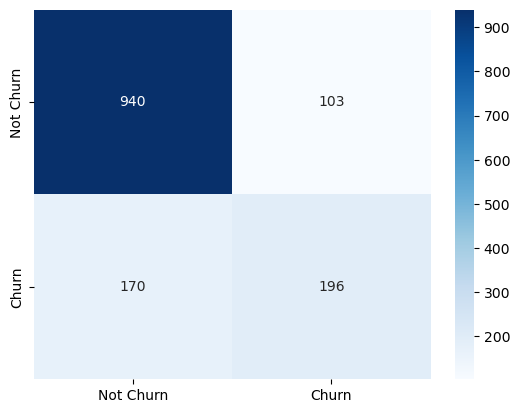

In [40]:
xgboost()

<span style="font-family:Ebrima; font-weight:bold;font-size:1.5em;color:#b44b97;">Part 1 - 3 b Improve performance of the XGBoost as much as possible. Also print best performing parameters along with train and test performance.

<span style="font-family:Ebrima; font-weight:bold;font-size:1em;color:#457dba;"> Hyperparameter Tuning for XBG Classifier

In [41]:
#defining various parameters thru dict to get best parameters
params = {
    'n_estimators': [100,200,300,400,500],
    'learning_rate': [0.1,0.25,0.5,0.75,1],
    'gamma': [0.01,0.25,0.50,0.75,1.0]
}

for i in tqdm(params,desc="Calculating Parameters…"): #Progress bar
    grid = GridSearchCV(XGBClassifier(n_jobs=-1), params, n_jobs=-1, cv=KFold(n_splits=3), scoring='roc_auc') #using XGBboost as base model checking on diff parameter using grid search and Kfold 
    grid.fit(Xtrain, ytrain)
print("Completed!")

print('Best score:', grid.best_score_) #getting model best parameters score
print('Best score:', grid.best_params_) #getting best parameters score

Calculating Parameters…: 100%|██████████████████████████████████████████████████████████| 3/3 [17:25<00:00, 348.48s/it]

Completed!
Best score: 0.8343809592251056
Best score: {'gamma': 1.0, 'learning_rate': 0.1, 'n_estimators': 100}


In [42]:
from xgboost import XGBClassifier
def xgboost():
    model = XGBClassifier(gamma= 1, learning_rate=0.1, n_estimators=100,objective='binary:logistic',eval_metric='mlogloss',random_state=12)
    model.fit(Xtrain,ytrain)
    ypredict=model.predict(Xtest)
    cm = confusion_matrix(ytest,ypredict)
    cm = pd.DataFrame(cm,index=[i for i in ['Not Churn','Churn']],columns= [i for i in ['Not Churn','Churn']])
    sns.heatmap(cm,annot=True,fmt='g',cmap='Blues') 
    report = classification_report(ytest,ypredict)
    print("Model Accuracy Score:",accuracy_score(ytest,ypredict))
    print(report)

Model Accuracy Score: 0.8119233498935415
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1043
           1       0.67      0.54      0.60       366

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409



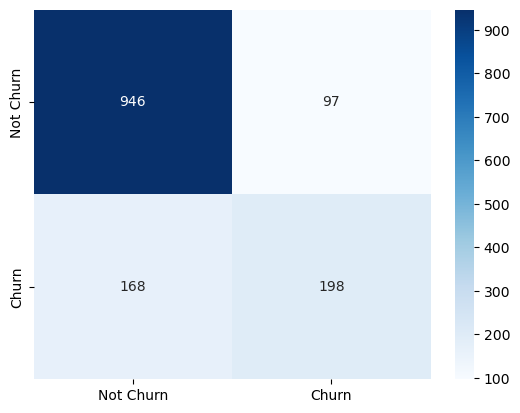

In [43]:
xgboost()

<span style="font-family:Ebrima; font-weight:bold;font-size:2.4em;color:#659A8E;"> PART B

<span style="font-family:Ebrima; font-weight:bold;font-size:1.5em;color:#b44b97;">Part 2 - Build a machine learning pipeline that will run autonomously with the csv file and return bestperforming model

In [44]:
# Read CSV Function section
def Upload_data():
    print('\033[1m \033[93m Running Upload Function!!!\033[0m')
    data = pd.read_csv('churn.csv')# read churn dataset csv
    print('\033[1m \033[93m Completed!\033[0m')
    return data # return the dataset to the AutoML function
#-------------------------------------------------------------------------------------------------------------------------------
# Exploratory data Analysis section
def Data_Exploration(df):
    print('\033[1m \033[93m Running Data Exploration Function!!! \033[0m')
    #head data of the dataframe
    head = df.head(5) #getting top 5 of the dataset
    print('\033[1m1. The Top 5 Rows in the DataFrame:\n\033[0m',head)
    
    #tail datas of the dataframe
    tail = df.tail(5)  #getting bottom 5 of the dataset
    print('\033[1m\n2. The Bottom 5 Rows in the DataFrame:\n\033[0m',tail)
    
    # Shape of the dataframe
    shape = df.shape
    print('\033[1m\n3.Shape :\033[0m\n \033[1m The DataFrame as\033[94m {}\033[0m\033[1m Rows and\033[0m\033[91m {} \033[0m\033[1m Columns\033[0m'.format(shape[0],shape[1]))
    
    #information abount dataframe columns
    print ('\033[1m\n4.The Infomation of the DataFrame :\033[0m\n')
    info = df.info(verbose=True,memory_usage=False,show_counts=True)
    
    #duplicated report
    print("\n\033[1m5.Duplication Report:\033[0m")
    if df.duplicated().any() == False:
         print('\033[1m5.1.No Duplicated Values in the DataFrame\033[0m')
    else:
         print('\033[1m5.1.The Duplicated Values:',df[df.duplicated()])
    
    #descriptions about the dataframe
    describe = df.describe()
    print('\033[1m\n 6.The Describtion of the DataFrame :\033[0m\n',describe)
    
    #change missing values to null values
    df = df.replace(' ',np.nan)
    null_value = df.isnull().sum().sum()
    if null_value == 0:
        print("7. No Null Values in the DataFrame")
    else:
        for col in df.columns:
            if df[col].isnull().sum() == 0:
                pass
            else:
                print("\033[1m\n7.Null values Report:\033[0m") 
                print("The {} column as {} Values \n".format(col,df[col].isnull().sum()))
    #Dealing with Missing values
    print('\033[1m8.Dealing with Null values!!!!!\033[0m')
    for col in df.columns:
        if df[col].isnull().sum() ==0:
            pass
        else:
            df[col] = pd.to_numeric(df[col])
    df.fillna(df.mean(),inplace=True)
    print("\033[1m8.1.Null values Report after Dropping Null Values:\033[0m\n{}".format(df.isnull().sum())) 
#     print(df.dtypes)
    #unique values
    print('\033[1m\n9.Unique Value Report:\033[0m\n')
    for col in df.columns:
        if df[col].dtypes == 'object':
            unique = df[col].unique()
            df[col]=df[col].astype('category')
            print('\033[1mThe Unique Values in the {} is:\033[0m {}\t'.format(col,len(unique)),unique)
    # Correlation
    corr = df.corr()
    print ('10.The Correlation Heat Map of the DataFrame')
    sns.heatmap(corr,annot=True,fmt='g',cmap='magma')
    #export analysied and cleared dataset
    print('\033[1m \033[93m Completed!\033[0m')
    return df
#-------------------------------------------------------------------------------------------------------------------------------
# Data_Preprocessing section
def Data_Preprocessing(df):
    print('\033[1m \033[93m Running Data Preproccessing Function!!!\033[0m')
    encoder = LabelEncoder() # defining Label Encoder
    scaler = StandardScaler() # defining Standard Scaler
    dummies_list = [] # list to store dummie feature columns
    for col in df.columns: #for loop from the columns of the dataset
        if df[col].dtypes == 'category':  #check the columns datatypes as Category
            if len(df[col].unique()) == df.shape[0]: #from selected categorical column check for the conut of unique elements
                df=df.drop(columns=col) #if the unique elements conuts and no of columns are equal drop the columns 
            elif len(df[col].unique()) == 2: # if unique elements counts is equal to 2
                df[col] = encoder.fit_transform(df[col]) #call for Label encoder to code the unique elements and convert into numeric
            elif len(df[col].unique()) >= 3: # if unique elements counts is grater or equal to 3
                dummies_list.append(col) # add the columns into dummie list
    df = pd.get_dummies(df,columns=dummies_list) #create Dummie Variable using the dummies list
    
    #Data Normalization
    scaler_list =[] # list to store scaler columns feature columns
    for col in df.columns: #for loop from the columns of the dataset
        if df[col].mean()>1: #check for the Mean if the col if mean >1 
            scaler_list.append(col)  # add the columns into scaler list
    df[scaler_list]=scaler.fit_transform(df[scaler_list]) #fit and Transform the scalerlist to mormailize the data
    print('\033[1m \033[93m Completed!\033[0m')
    return df #return Modified clear dataset
#-------------------------------------------------------------------------------------------------------------------------------
#Hypothesis Testing section
def Hypothesis_Testing(df):
    print('\033[1m \033[93mRunning Data Hypothesis Testing Function!!!\033[0m')
    stats_data=[] # Empty list stats data
    variable = df.columns #get the columns name into varible
    variable = [var for var in variable if df[var].dtypes == 'uint8'] #from the columns sorting the columns having datatypes Uint, they are the catgorical data convered into dummie variables
    for var in variable: #define for loop from the sorted variables
        values = [] # to store the Individual column stats
        df_var = pd.pivot_table(data=df,index='Churn',columns=var,aggfunc='size') #creating pivot table with churn as index unsing the induvial columns
#         print(df_var)
        chi_sq_Stat,p_value,deg_freedom,exp_freq = stats.chi2_contingency(df_var) #perfroming chi2 contingency test for the pivot table and getting the chi_sq_Stat,p_value,deg_freedom,exp_freq
        values.append(var) # adding column name to the value list
        values.append(chi_sq_Stat) # adding chi2 stats name to the value list
        values.append(p_value) # adding p_vlaue name to the value list
        values.append(deg_freedom) # adding degree of freedom name to the value list
        values.append(exp_freq) # adding frequency name to the value list
        if p_value < 0.05:  # check for the p_value if p_value <0.05
            values.append('Rejecting Null Hypothesis') # adding Rejecting name to the value list
        else:
            values.append('Fail to Reject Null Hypothesis') # adding Fail to Reject name to the value list
            df = df.drop(columns=var) # dropping the columns that p_values less then 0.05
        stats_data.append(values) # join all the stats data to the stat_list
    stats_df = pd.DataFrame(stats_data,columns=['Feature','Chi 2 Stats','P_Value','Degree of Freedom','Exp Feq','Status']) #making data frame for stats_data list
    print('\033[1m \033[93m Completed!\033[0m')
    return stats_df,df #retuning the stats_data and clear data set for modeling 
#-------------------------------------------------------------------------------------------------------------------------------
#Features Engineering and Model Selection section
def Feature_Engineering(df):
    print('\033[1m \033[93m Running Feature Engineering Function!!!\033[0m')
    #Target variable selection
    target = input('Enter the Target Feature:') #getting Target Variable or columns from user
    #test sample data type
    testsize = float(input("Enter the Test Data Size:")) 
    if target in df.columns:
        print("\033[30m\nThe Selected Target Feature is:\033[0m",target) # if user enter columns id in the dataframe columns pass
    else:
        print('\033[31mError! - The Enter Target Feature Not Available in the DataSet\033[0m') #else print error
    
    print("\nTrain Data as {} % of data for Original Dataset".format(100-testsize))#displays the train and test dataset split
    print("\nTest Data as {} % of data for Original Dataset".format(testsize))
    
    X = df.drop(columns=target) #creating X dataset by droping the user selected target columns
    y = df[target] # creating y using the target columns selected from the user

    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=testsize/100,random_state=12) #spliting data into train and test dataset with user input percentage
    
    #imbalace Data Analysis
    zero = y_train.value_counts()[0]/len(y_train) #check for the imbalace in the Target variables 0 values counts
    one = y_train.value_counts()[1]/len(y_train) #check for the imbalace in the Target variables 1 values counts
    if one == zero: # counts are same pass
        pass
    else: #or apply imb SMOTE to balace the data
        smote = SMOTE(random_state=12)
    X_train,y_train = smote.fit_resample(X_train,y_train)      
    #Model Selection        
    # Emsemble Model
    ensemble_model = [] #creating empty list to store the homogenous models 
    ensemble_model.append(['Radmon Forest Classifier',RandomForestClassifier(random_state=12,criterion='entropy')]) # define RandomForestClassifier model with basic parameters with name 
    ensemble_model.append(['Bagging Clasifier', BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=2)]) # define Bagging Clasifier model with basic parameters with name ifier
    ensemble_model.append(['Adaptive Boosting Classifier',AdaBoostClassifier()]) # define Adaptive Boosting model with basic parameters with name 
    ensemble_model.append(['Gradient Boosting Classifier',GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=0)]) # define Gradient Boosting model with basic parameters with name 
    ensemble_model.append(['XGBoost',XGBClassifier(learning_rate=0.1,objective='binary:logistic',random_state=0,eval_metric='mlogloss')]) # define XGBoost model with basic parameters with name 
    ensemble_model.append(['LGBMClassifier',LGBMClassifier(random_state=0)]) # define LGBMClassifier model with basic parameters with name 
#     ensemble_model.append(['CatBoostClassifier',CatBoostClassifier(learning_rate=0.1,loss_function= 'Logloss', eval_metric='AUC',random_state=0)]) # define model with basic parameters with name 
    # Hybrid Model
    hybrid_model = []
    hybrid_model.append(['RidgeClassifier',RidgeClassifier()]) # define RidgeClassifier model with basic parameters with name 
    hybrid_model.append(['Logistic Regression',LogisticRegression(random_state=12)]) # define Logistic Regression model with basic parameters with name 
    hybrid_model.append(['SVM',SVC(random_state=0)]) # define SVM model with basic parameters with name 
    hybrid_model.append(['KNeigbors',KNeighborsClassifier()]) # define KNeigbors model with basic parameters with name 
    hybrid_model.append(['GaussianNB',GaussianNB()]) # define GaussianNB model with basic parameters with name 
    hybrid_model.append(['BernoulliNB',BernoulliNB()]) # define BernoulliNB model with basic parameters with name 
    hybrid_model.append(['DecisionTree',DecisionTreeClassifier(random_state=0)]) # define DecisionTree model with basic parameters with name 
    print('\033[1m \033[93m Completed!\033[0m')
    return X_train,X_test,y_train,y_test,ensemble_model,hybrid_model # retuning the train,test datasets and model list for further evaluation
#-------------------------------------------------------------------------------------------------------------------------------
# Model Selection and Training section
def Model_Selection_n_Training(X_train,X_test,y_train,y_test,ensemble_model,hybrid_model):
    print('\033[1m \033[93m Running Model Selection and Training Function!!!\033[0m')
    model_data = [] # empty list to store model evaluations
    prediction_data = [] # empty list to store the predictions
    predication_prob = [] # empty list to store the predicition probability 
    for model in range(len(ensemble_model)): # for loop with the len of the emseble model list
        values = [] #empty list to store Individual model evaluations 
        start = time.time() # start timer to chcek to the model run time
        train_model = ensemble_model[model][1] # geting model for the list
        train_model.fit(X_train,y_train) #fiting the train and test data into the model
        y_pred = train_model.predict(X_test) # getting prediction from the model
#         y_pred_prob = train_model.predict_proba(X_test)
        accuracies = cross_val_score(estimator= train_model, X = X_train,y = y_train, cv=10) # evalution of the model using cross validation
        cm = confusion_matrix(y_test,y_pred) #generating confusion matrics
        # Metrics
        train_score = train_model.score(X_train,y_train) # calulating the train score
        test_score = train_model.score(X_test,y_test) # calulating the test score
        accu_score = accuracy_score(y_test,y_pred) # calulating the accuracy score
        roc = roc_auc_score(y_test,y_pred) # calulating the ROC_AUC score
        precision = precision_score(y_test,y_pred) # calulating the percision
        recall = recall_score(y_test,y_pred) # calulating the recall value
        f1 = f1_score(y_test,y_pred) # calulating the f1 score
        end = time.time() # getting the model end time
        duration = end-start # calulating the overall duartion
        #
        values.append(ensemble_model[model][0]) #Adding metris to the value columns
        values.append(train_score) #Adding metris to the value columns
        values.append(test_score) #Adding metris to the value columns
        values.append(accu_score) #Adding metris to the value columns
        values.append(roc) #Adding metris to the value columns
        values.append(precision) #Adding metris to the value columns
        values.append(recall) #Adding metris to the value columns
        values.append(f1) #Adding metris to the value columns
        values.append(duration) #Adding metris to the value columns
        values.append("Ensemble") #Adding metris to the value columns
        prediction_data.append(y_pred) #Adding metris to the value columns
#         predication_prob.append(y_pred_prob)
        model_data.append(values) # adding values list to model_data list 
    values=[] #empty list to store Individual model evaluations
    hybrid_ensemble_model = VotingClassifier(hybrid_model) #defining Voting Classifier with the hetrogenous models
    start = time.time()  # start timer to chcek to the model run time
    hybrid_ensemble_model.fit(X_train,y_train) # fitting train and test set into the voting classififer 
    y_pred = hybrid_ensemble_model.predict(X_test)
    accuracies = cross_val_score(estimator=hybrid_ensemble_model, X = X_train,y = y_train, cv=10) # evalution of the model using cross validation
    cm = confusion_matrix(y_test,y_pred) #generating confusion matrics
    # Metrics
    train_score = train_model.score(X_train,y_train) # calulating the train score
    test_score = train_model.score(X_test,y_test) # calulating the test score
    accu_score = accuracy_score(y_test,y_pred) # calulating the accuracy score
    roc = roc_auc_score(y_test,y_pred) # calulating the ROC_AUC score
    precision = precision_score(y_test,y_pred) # calulating the percision
    recall = recall_score(y_test,y_pred) # calulating the recall value
    f1 = f1_score(y_test,y_pred) # calulating the f1 score
    end = time.time() # getting the model end time
    duration = end-start  # calulating the overall duartion
    values.append('Hybrid Ensemble') #Adding metris to the value columns
    values.append(train_score) #Adding metris to the value columns
    values.append(test_score) #Adding metris to the value columns
    values.append(accu_score) #Adding metris to the value columns
    values.append(roc) #Adding metris to the value columns
    values.append(precision) #Adding metris to the value columns
    values.append(recall) #Adding metris to the value columns
    values.append(f1) #Adding metris to the value columns
    values.append(duration) #Adding metris to the value columns
    values.append("Hybrid") #Adding metris to the value columns
    prediction_data.append(y_pred) # adding indiviual model prediction into prediction data 
    model_data.append(values) # adding indiviual model data into model_data 
    data = pd.DataFrame(model_data,columns=['Model','Train Score','Test Score','Accuracy Score','ROC','Precision','Recall','F1','Duration','Type']) #crateing datafrmae using the model_data
    print(data)
    print('\033[1m \033[93m Completed!\033[0m')
    return data,prediction_data #retuning the model_data Dataframe and Prediction data 
#-------------------------------------------------------------------------------------------------------------------------------
#Hyper_Parameter_Tuning section
def Hyper_Parameter_Tuning(X_train,X_test,y_train,y_test):
    print('\033[1m \033[93m Running Hyper Parameter Tuning Function!!!\033[0m')
    #Finding Best Parameter GridSearch CV and RandomSearchCV 
    #Defining AdaBoostClassifier for the search for Parameter
    gradient_boost_clf = GradientBoostingClassifier(random_state=12) # getting best model from the Model_Selection_n_Training,model with high recall value 
    skfold = StratifiedKFold(n_splits=5)  #definginf stratified fold cross-validator meothod
    #efinging various up the Parameters
    parameter = {
        'n_estimators' : [25, 50 ,75, 100, 200],
        'learning_rate': [0.005 ,0.05, 0.5, 1.5],
        'max_depth': [2, 4, 6, 8],
        'max_features': [10, 12, 17]
        }
    #Fiting the gradient Boosting in Gridsearch CV for Best Parameters
    for i in tqdm(parameter,desc="Calculating Parameters…"): #progress bar function
          grid_CV = GridSearchCV(gradient_boost_clf,parameter,cv=skfold, scoring="accuracy",verbose=1, n_jobs=-1) #defining the grid search with base as adaboost model and various parameters
          grid_CV.fit(X_train,y_train) #fiting the train and test data into the grid search cv
          grid_CV_best_param = grid_CV.best_params_ # getting the best parameters
    print('The Best Parameters for the GraidentBoosting in Grid Search CV: {}'.format(grid_CV_best_param))
    print("Completed!")
    
    #Fiting the AdaBoosting in RandomSearch CV for Best Parameters
    random_CV = RandomizedSearchCV(gradient_boost_clf,parameter,cv=skfold, scoring="accuracy",verbose=1, n_jobs=-1)
    random_CV.fit(X_train,y_train) #fiting the train and test data into the grid search cv
#     plot_grid_search(random_CV)
#     table_grid_search(random_CV)
    random_CV_best_param = random_CV.best_params_  # getting the best parameters
    print(random_CV_best_param)
    
    best_model = [] #empty list to store the models with best fit patameters
    best_model.append(['Gradient GridSearch CV',GradientBoostingClassifier(learning_rate=0.05, max_depth=8, max_features=10, n_estimators=200)]) #defing adaboost with the best fit parameters fro grid search cv 
    best_model.append(['Gradient RamdomizedSearch CV',GradientBoostingClassifier(n_estimators= 200, max_features=12, max_depth=8, learning_rate= 0.05)]) #defing adaboost with the best fit parameters fro randomized search cv
    model_evl = []  #empty list to store the models metrics
    for m in best_model: #looping the models
        values = [] #empty list to store Individual model evaluations
        start = time.time()# start timer to chcek to the model run time
        model = m[1] # geting model for the list
#         print (m[0])
        model.fit(X_train,y_train) #fiting the train and test data into the model
        y_pred = model.predict(X_test)  # getting prediction fro the model
        train_score = model.score(X_train,y_train) # calulating the train score
        test_score = model.score(X_test,y_test) # calulating the test score
        accu_score = accuracy_score(y_pred,y_test) # calulating the accuracy score
        cm = confusion_matrix(y_pred,y_test) # creating the confusion matrix
        ax= plt.subplot()
        sns.heatmap(cm,annot=True,fmt='g',cmap='Blues',ax=ax) #ploting the comfusion matix
        cr = classification_report(y_pred,y_test) #classification report
        print(cr)
        accuracies = cross_val_score(estimator=model, X = X_train,y = y_train, cv=10) # calulating the cross validation scores
        roc = roc_auc_score(y_test,y_pred) # calulating the roc_auc curve
        precision = precision_score(y_test,y_pred) # calulating the precision
        recall = recall_score(y_test,y_pred) # calulating the recall
        temp_recall = recall
        f1 = f1_score(y_test,y_pred) # calulating the f1
        end = time.time() #end time
        duration = end-start #calcukating total duration
        values.append(m[0]) #Adding metris to the value list
        values.append(train_score) #Adding metris to the value list
        values.append(test_score) #Adding metris to the value list
        values.append(accu_score) #Adding metris to the value list
        values.append(roc) #Adding metris to the value list
        values.append(precision) #Adding metris to the value list
        values.append(recall) #Adding metris to the value list
        values.append(f1) #Adding metris to the value list
        values.append(duration) #Adding metris to the value list
        values.append(m[1]) #added model to the values list
        model_evl.append(values) #Adding metris to the value list
    best_model_df = pd.DataFrame(model_evl,columns=['Paramete Search Method','Train Score','Test Score', 'Accuracy Score', 'ROC_AUC', 'Precision','Recall','F1','Duration','Model']) # Creating Dataframe with best Model Data
    print('\033[1m \033[93m Completed!\033[0m')
    best_model_df.sort_values(by=['Recall'],inplace=True,ascending=False)
    best = best_model_df['Model'].iloc[0]
    return best,best_model_df,random_CV_best_param,grid_CV_best_param #return the results
def SaveModel(model):
    import pickle
    with open('BestModel','wb') as f:
        pickle.dump(model,f)

In [45]:
def AutoML(): #AutoML Pipeline Main Function
    data = Upload_data() # function calls the Upload_data and ask for data
    data = Data_Exploration(data) # function calls the Data_Exploration with Data and ask for Analyised data
    data = Data_Preprocessing(data) # function calls the Data_Preprocessing with Data and ask for cleaned data
    stats_df,data= Hypothesis_Testing(data) # function calls the Hypothesis_Testing with Data and ask for features realiablity and staticstc data
    X_train,X_test,y_train,y_test,ensemble_model,hybrid_model = Feature_Engineering(data) # function calls the Feature_Engineering with Data and ask for data thats ready for model
    dataframe,prediction_data = Model_Selection_n_Training(X_train,X_test,y_train,y_test,ensemble_model,hybrid_model) #function calls the Model_Selection_n_Training fits the data with various ML Model and form as data set
    best,best_model_df,random_CV_best_param,grid_CV_best_param = Hyper_Parameter_Tuning(X_train,X_test,y_train,y_test) #function calls the Hyper_Parameter_Tuning on the best model get its get parameter if 
    SaveModel(best)
    return data,stats_df,best_model_df,dataframe #return estenssial Evaluation

  Running Upload Function!!!
  Completed!
  Running Data Exploration Function!!! 
1. The Top 5 Rows in the DataFrame:
    customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No 

  Completed!
  Running Feature Engineering Function!!!
Enter the Target Feature:Churn
Enter the Test Data Size:25

The Selected Target Feature is: Churn

Train Data as 75.0 % of data for Original Dataset

Test Data as 25.0 % of data for Original Dataset
  Completed!
  Running Model Selection and Training Function!!!
                          Model  Train Score  Test Score  Accuracy Score  \
0      Radmon Forest Classifier     0.998451    0.771153        0.771153   
1             Bagging Clasifier     0.991092    0.766042        0.766042   
2  Adaptive Boosting Classifier     0.803382    0.757524        0.757524   
3  Gradient Boosting Classifier     0.817325    0.756388        0.756388   
4                       XGBoost     0.896592    0.771721        0.771721   
5                LGBMClassifier     0.904338    0.767178        0.767178   
6               Hybrid Ensemble     0.904338    0.767178        0.760363   

        ROC  Precision    Recall        F1   Duration      Type  
0  0.71

Calculating Parameters…:   0%|                                                                   | 0/4 [00:00<?, ?it/s]

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


Calculating Parameters…:  25%|██████████████▌                                           | 1/4 [06:34<19:42, 394.02s/it]

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


Calculating Parameters…:  50%|█████████████████████████████                             | 2/4 [13:07<13:07, 393.97s/it]

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


Calculating Parameters…:  75%|███████████████████████████████████████████▌              | 3/4 [19:42<06:34, 394.04s/it]

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


Calculating Parameters…: 100%|██████████████████████████████████████████████████████████| 4/4 [26:15<00:00, 393.80s/it]


The Best Parameters for the GraidentBoosting in Grid Search CV: {'learning_rate': 0.05, 'max_depth': 8, 'max_features': 10, 'n_estimators': 200}
Completed!
Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_estimators': 75, 'max_features': 17, 'max_depth': 8, 'learning_rate': 0.05}
              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1244
           1       0.63      0.56      0.60       517

    accuracy                           0.78      1761
   macro avg       0.73      0.71      0.72      1761
weighted avg       0.77      0.78      0.77      1761

              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1245
           1       0.63      0.56      0.59       516

    accuracy                           0.77      1761
   macro avg       0.73      0.71      0.72      1761
weighted avg       0.77      0.77      0.77      1761

  Completed!


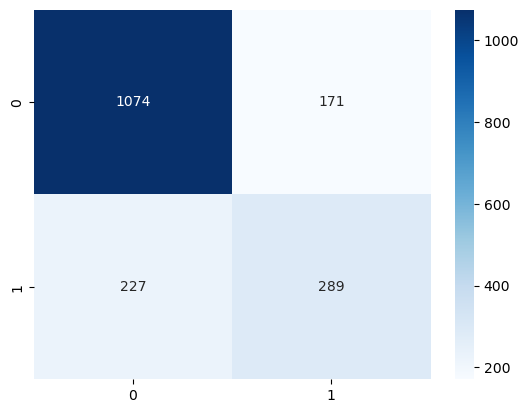

In [46]:
data,stats_df,best_model_df,dataframe = AutoML() # call the Mail AntoMl Pipeline

<span style="font-family:Ebrima; font-weight:bold;font-size:1em;color:#457dba;"> Obersevation on Results:
    
<span style="font-family:Ebrima; font-weight:bold;font-size:1em;color:#457dba;"> After the Proprcessing the feature in the dataset are much high, in order to justfy all the feature in the dataset will make a impact on the target feature, so we are performing the chi2 test to verify the relationship between the categorical variables and target variables.
    
<span style="font-family:Ebrima; font-weight:bold;font-size:1em;color:#e31c3f;">Null hypothesis: </span> Feature as no Impact on Target Variable
    
<span style="font-family:Ebrima; font-weight:bold;font-size:1em;color:#20df78;">Alternative Hypothesis : </span>Feature as significant impact in the Target columns.
    
    
<span style="font-family:Ebrima;font-size:1em;color:#3246cd;"> 1. for all the Features only 'MultipleLines_No phone service' as p_value less then 0.5 that give no impact on the target feature. we are removing the Feature from the dataset.
  

In [47]:
stats_df # Staticstics of the objects Feature for the Dataset

Feature  Chi 2 Stats        P_Value  \
0                          MultipleLines_No     7.323697   6.805128e-03   
1            MultipleLines_No phone service     0.915033   3.387825e-01   
2                         MultipleLines_Yes    11.143251   8.433795e-04   
3                       InternetService_DSL   108.075457   2.587377e-25   
4               InternetService_Fiber optic   666.808021  4.940476e-147   
5                        InternetService_No   364.519799   2.920300e-81   
6                         OnlineSecurity_No   825.296686  1.706916e-181   
7        OnlineSecurity_No internet service   364.519799   2.920300e-81   
8                        OnlineSecurity_Yes   205.633104   1.232098e-46   
9                           OnlineBackup_No   504.653442  9.236013e-112   
10         OnlineBackup_No internet service   364.519799   2.920300e-81   
11                         OnlineBackup_Yes    47.260854   6.214093e-12   
12                      DeviceProtection_No   447.817568   2.153157e-99   
13     DeviceProtection_No internet service   364.519799   2.920300e-81   
14                     DeviceProtection_Yes    30.513395   3.315693e-08   
15                           TechSupport_No   799.672433  6.357408e-176   
16          TechSupport_No internet service   364.519799   2.920300e-81   
17                          TechSupport_Yes   190.166842   2.923567e-43   
18                           StreamingTV_No   116.454273   3.779949e-27   
19          StreamingTV_No internet service   364.519799   2.920300e-81   
20                          StreamingTV_Yes    27.862522   1.302484e-07   
21                       StreamingMovies_No   119.973799   6.410178e-28   
22      StreamingMovies_No internet service   364.519799   2.920300e-81   
23                      StreamingMovies_Yes    26.251336   2.997474e-07   
24                  Contract_Month-to-month  1153.971661  6.147586e-253   
25                        Contract_One year   221.710212   3.831327e-50   
26                        Contract_Two year   641.828115  1.337680e-141   
27  PaymentMethod_Bank transfer (automatic)    97.316938   5.907285e-23   
28    PaymentMethod_Credit card (automatic)   126.296354   2.648297e-29   
29           PaymentMethod_Electronic check   640.557084  2.528030e-141   
30               PaymentMethod_Mailed check    58.708410   1.828582e-14   

    Degree of Freedom                                            Exp Feq  \
0                   1  [[2683.603861990629, 2490.396138009371], [969....   
1                   1  [[4672.982251881301, 501.01774811869944], [168...   
2                   1  [[2991.4138861280703, 2182.5861138719297], [10...   
3                   1  [[3395.460457191538, 1778.5395428084623], [122...   
4                   1  [[2899.5851199772824, 2274.4148800227176], [10...   
5                   1  [[4052.9544228311797, 1121.04557716882], [1464...   
6                   1  [[2604.263808036348, 2569.736191963652], [940....   
7                   1  [[4052.9544228311797, 1121.04557716882], [1464...   
8                   1  [[3690.781769132472, 1483.218230867528], [1333...   
9                   1  [[2905.462161010933, 2268.537838989067], [1049...   
10                  1  [[4052.9544228311797, 1121.04557716882], [1464...   
11                  1  [[3389.5834161578873, 1784.4165838421127], [12...   
12                  1  [[2900.3197501064888, 2273.6802498935112], [10...   
13                  1  [[4052.9544228311797, 1121.04557716882], [1464...   
14                  1  [[3394.7258270623315, 1779.2741729376687], [12...   
15                  1  [[2622.629561266506, 2551.370438733494], [947....   
16                  1  [[4052.9544228311797, 1121.04557716882], [1464...   
17                  1  [[3672.4160159023145, 1501.5839840976857], [13...   
18                  1  [[3109.689336930285, 2064.310663069715], [1123...   
19                  1  [[4052.9544228311797, 1121.04557716882], [1464...   
20                  1  [[3185.356240238

In [48]:
dataframe

Model  Train Score  Test Score  Accuracy Score  \
0      Radmon Forest Classifier     0.998451    0.771153        0.771153   
1             Bagging Clasifier     0.991092    0.766042        0.766042   
2  Adaptive Boosting Classifier     0.803382    0.757524        0.757524   
3  Gradient Boosting Classifier     0.817325    0.756388        0.756388   
4                       XGBoost     0.896592    0.771721        0.771721   
5                LGBMClassifier     0.904338    0.767178        0.767178   
6               Hybrid Ensemble     0.904338    0.767178        0.760363   

        ROC  Precision    Recall        F1   Duration      Type  
0  0.715131   0.557809  0.597826  0.577125  23.297554  Ensemble  
1  0.718699   0.545977  0.619565  0.580448  30.605534  Ensemble  
2  0.757903   0.524812  0.758696  0.620444  10.287539  Ensemble  
3  0.760647   0.522895  0.769565  0.622691  15.472993  Ensemble  
4  0.741513   0.551237  0.678261  0.608187  10.608679  Ensemble  
5  0.732818   0.544803  0.660870  0.597250   2.846624  Ensemble  
6  0.753501   0.529595  0.739130  0.617060  75.905592    Hybrid

In [49]:
dataframe.sort_values(by=['Recall'],inplace=True,ascending=False)
dataframe

Model  Train Score  Test Score  Accuracy Score  \
3  Gradient Boosting Classifier     0.817325    0.756388        0.756388   
2  Adaptive Boosting Classifier     0.803382    0.757524        0.757524   
6               Hybrid Ensemble     0.904338    0.767178        0.760363   
4                       XGBoost     0.896592    0.771721        0.771721   
5                LGBMClassifier     0.904338    0.767178        0.767178   
1             Bagging Clasifier     0.991092    0.766042        0.766042   
0      Radmon Forest Classifier     0.998451    0.771153        0.771153   

        ROC  Precision    Recall        F1   Duration      Type  
3  0.760647   0.522895  0.769565  0.622691  15.472993  Ensemble  
2  0.757903   0.524812  0.758696  0.620444  10.287539  Ensemble  
6  0.753501   0.529595  0.739130  0.617060  75.905592    Hybrid  
4  0.741513   0.551237  0.678261  0.608187  10.608679  Ensemble  
5  0.732818   0.544803  0.660870  0.597250   2.846624  Ensemble  
1  0.718699   0.545977  0.619565  0.580448  30.605534  Ensemble  
0  0.715131   0.557809  0.597826  0.577125  23.297554  Ensemble

<span style="font-family:Ebrima; font-weight:bold;font-size:1em;color:#457dba;"> Obersevation on Results:
    
<span style="font-family:Ebrima;font-size:1em;color:#3246cd;"> 1. From All the Emsemble and Hybrid the result show the all model perform very well in the data dataset not overfiting, but in train set the score are lower.
    
<span style="font-family:Ebrima;font-size:1em;color:#3246cd;"> 2. Selecting Best Model with Recall value beacase Recall Give how accurate the model prediction are.
    
<span style="font-family:Ebrima;font-size:1em;color:#3246cd;"> 3. Gradient Boosting Classifier Give 0.769565 Recall Value.
    
<span style="font-family:Ebrima;font-size:1em;color:#3246cd;"> 4. Fot Hyperparameter tuning we are selecting the Gradient Boosting Classifier
    
    

In [51]:
best_model_df # Result of Different ML Model

Paramete Search Method  Train Score  Test Score  Accuracy Score  \
0        Gradient GridSearch CV     0.967854    0.775696        0.775696   
1  Gradient RamdomizedSearch CV     0.969145    0.773992        0.773992   

    ROC_AUC  Precision    Recall        F1   Duration  \
0  0.729448   0.562863  0.632609  0.595701  72.445256   
1  0.726890   0.560078  0.628261  0.592213  77.861860   

                                               Model  
0  ([DecisionTreeRegressor(criterion='friedman_ms...  
1  ([DecisionTreeRegressor(criterion='friedman_ms...

<span style="font-family:Ebrima; font-weight:bold;font-size:1em;color:#457dba;"> Obersevation on Results:

<span style="font-family:Ebrima;font-size:1em;color:#3246cd;"> 1. After the Hyper Parameter Tuning, with the best parameter fit with the Train and Test Data the Gradient GridSearch CV give 0.643478.

<span style="font-family:Ebrima;font-size:1em;color:#3246cd;">2. But the Hyper Parameter Tuning, the Accuracu score increase.
    
<span style="font-family:Ebrima;font-size:1em;color:#3246cd;">3. AdaBoost RamdomizedSearch CV	give us the higher results

<span style="font-family:Ebrima; font-weight:bold;font-size:1em;color:#457dba;"> Suggestion:
    
<span style="font-family:Ebrima;font-size:1em;color:#3246cd;"> The Model Score and Accuracy May change if we had more Balance data, the dataset as more Not Churn.